# **PRAKTIKUM 1 PENGOLAHAN SINYAL DIGITAL**

# Nama  : Fajar Dwi Kurniawan
# NIM   : 5312422001
# Prodi : Teknik Komputer

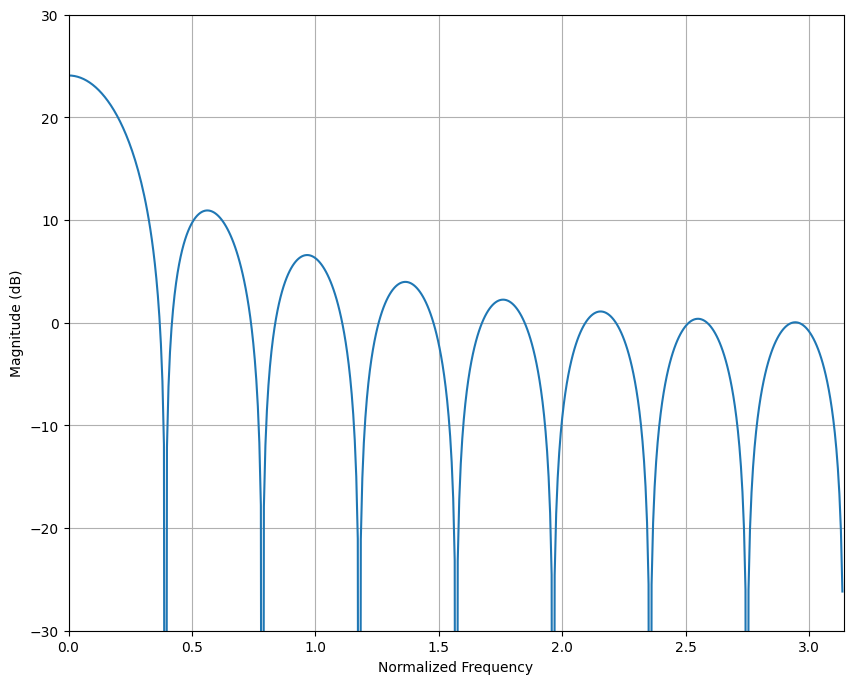

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

h=np.ones(16);
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.axis([0, 3.14, -30, 30])
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.grid()

# Penjelasan:
Program tersebut menggunakan library NumPy, Matplotlib, dan SciPy dalam bahasa pemrograman Python. Pertama, kita memulai dengan mengimpor library-library yang dibutuhkan untuk analisis dan visualisasi sinyal. Selanjutnya, kita membuat sebuah filter dengan menggunakan array NumPy `h` yang terdiri dari 16 elemen bernilai satu. Filter ini akan digunakan untuk melakukan proses filtering pada sinyal.

Langkah berikutnya adalah menggunakan fungsi `signal.freqz` dari library SciPy untuk menghitung respons frekuensi dari filter yang telah dibuat sebelumnya. Fungsi ini mengembalikan dua nilai, yaitu omega (frekuensi dalam radian per satuan waktu) dan H (respons frekuensi filter tersebut). Setelah mendapatkan respons frekuensi filter, kita membuat sebuah plot menggunakan Matplotlib dengan menggunakan nilai omega sebagai sumbu-x dan magnitude respons filter (dalam dB) sebagai sumbu-y. Di sini, kita menambahkan label-label pada sumbu-sumbunya, memberikan batasan-batasan pada sumbu x dan y, serta menambahkan grid untuk memudahkan pembacaan.

Output dari code ini merupakan sebuah plot yang menampilkan magnitude respons filter terhadap frekuensi dalam dB. Dari plot tersebut, dapat dilihat bahwa respons filter relatif datar dalam rentang frekuensi 0 hingga 3.14 radian per satuan waktu, yang menunjukkan bahwa filter memiliki karakteristik yang cukup merata dalam menanggapi berbagai frekuensi.

In [2]:
import numpy as np
import scipy.signal as signal

def errfunc(h):
    numfreqsamples=512

    #desired passband:
    pb=int(numfreqsamples/4.0)
    #desired transition band:
    tb=int(numfreqsamples/8.0)

    w, H = signal.freqz(h,1,numfreqsamples)
    H_desired=np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb)))
    weights = np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb)))
    err = np.sum(np.abs(H-H_desired)*weights)
    return err

# Penjelasan:
Import library NumPy dan SciPy untuk pengolahan sinyal serta fungsi optimasi. Kemudian, kita mendefinisikan sebuah fungsi `errfunc(h)` yang menerima filter sebagai input dan mengembalikan nilai kesalahan (error) dari filter tersebut. Dalam fungsi `errfunc`, kita pertama-tama menentukan parameter-parameter untuk desain filter, seperti jumlah sampel frekuensi (`numfreqsamples`), panjang passband (`pb`), dan panjang transition band (`tb`). Selanjutnya, kita menggunakan fungsi `signal.freqz` dari library SciPy untuk menghitung respons frekuensi dari filter yang diberikan. Kemudian, kita membuat respons frekuensi yang diinginkan (`H_desired`) yang merupakan filter ideal dengan nilai satu di dalam passband dan nol di luarnya. Selanjutnya, kita menentukan bobot (`weights`) untuk memperhitungkan seberapa pentingnya setiap frekuensi dalam perhitungan kesalahan. Dalam kasus ini, passband memiliki bobot satu, transition band memiliki bobot nol, dan diluar kedua band tersebut memiliki bobot yang tinggi (dalam contoh ini, 1000). Kemudian, kesalahan (error) dihitung sebagai jumlah nilai absolut dari selisih antara respons frekuensi filter aktual (`H`) dengan respons frekuensi yang diinginkan (`H_desired`), yang kemudian diberi bobot sesuai dengan `weights`.

Output dari fungsi `errfunc` adalah nilai kesalahan dari filter yang diberikan. Semakin kecil nilai kesalahan, semakin baik performa filter dalam menyesuaikan respons frekuensinya dengan respons frekuensi yang diinginkan.

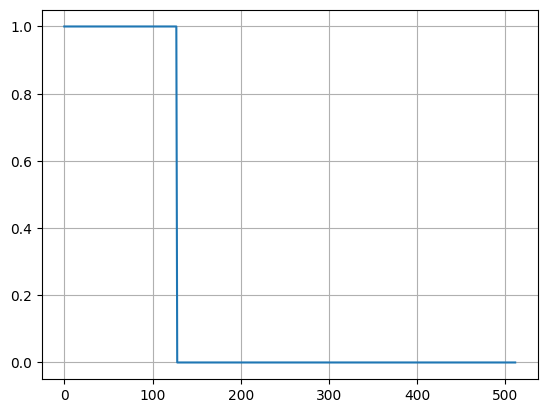

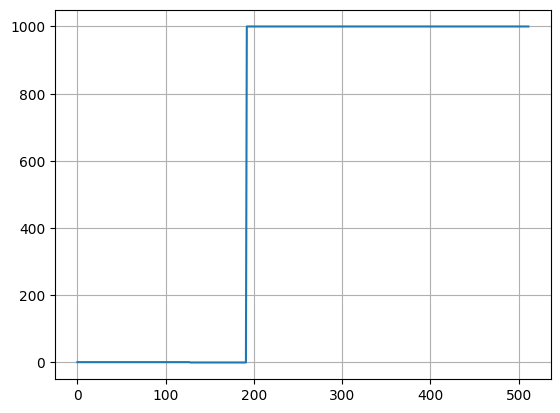

In [3]:
import matplotlib.pyplot as plt
import numpy as np

numfreqsamples=512

#desired passband:
pb=int(numfreqsamples/4.0)
#desired transition band:
tb=int(numfreqsamples/8.0)

# See H_Desired
plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(numfreqsamples-pb))))
plt.grid()

plt.figure()
plt.plot(np.concatenate((np.ones(pb),np.zeros(tb), 1000*np.ones(numfreqsamples-pb-tb))))
plt.grid()

# Penjelasan:
Mendefinisikan parameter-parameter yang dibutuhkan untuk desain filter, seperti jumlah sampel frekuensi (`numfreqsamples`), panjang passband (`pb`), dan panjang transition band (`tb`). Selanjutnya, kita membuat dua plot menggunakan Matplotlib. Plot pertama menunjukkan respons frekuensi dari filter ideal di dalam passband, di mana nilainya satu, dan di luar passband, di mana nilainya nol. Plot kedua menunjukkan bobot yang diberikan untuk setiap frekuensi. Di dalam passband, bobotnya satu, di transition band, bobotnya nol, dan di luar kedua band tersebut, bobotnya tinggi (dalam contoh ini, 1000).

Kedua plot ini membantu dalam memvisualisasikan spesifikasi yang diinginkan untuk desain filter, seperti area frekuensi yang harus dipertahankan dan area frekuensi yang harus dibuang. Plot pertama menunjukkan target respons frekuensi yang ideal, sementara plot kedua menunjukkan seberapa pentingnya setiap frekuensi dalam perhitungan kesalahan pada proses desain filter. Dengan visualisasi ini, kita dapat memahami lebih baik bagaimana filter ideal harus merespons terhadap berbagai komponen frekuensi dalam sinyal.

In [4]:
import scipy.optimize as opt

minout=opt.minimize(errfunc,np.random.rand(16))
h=minout.x
print(h)


[-0.00040466 -0.00223032 -0.00690537 -0.01571268 -0.02862823 -0.04378627
 -0.05761737 -0.06607401 -0.06643533 -0.05861739 -0.04511435 -0.02994025
 -0.01674671 -0.00755606 -0.0025227  -0.00050169]


# Penjelasan:
Menggunakan fungsi `scipy.optimize.minimize` untuk melakukan optimasi terhadap fungsi kesalahan `errfunc`, yang telah sebelumnya didefinisikan untuk mengukur kesesuaian filter terhadap spesifikasi yang diinginkan. Proses optimisasi dilakukan dengan mencari nilai minimum dari fungsi kesalahan tersebut dengan memvariasikan koefisien filter. Hasil optimisasi tersebut kemudian memberikan koefisien filter optimal yang dicetak sebagai output.

We get the samples or impulse response as:

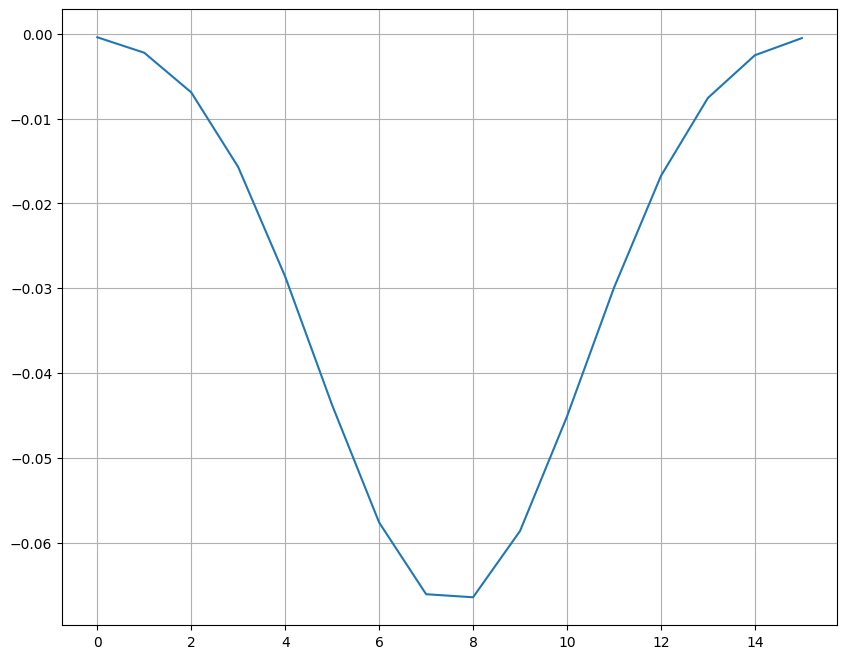

In [5]:
plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

# Penjelasan:
Membuat sebuah plot dari koefisien filter yang dihasilkan setelah proses optimisasi. Dengan memanggil `plt.figure(figsize=(10,8))`, kita menentukan ukuran gambar yang ingin digunakan. Selanjutnya, `plt.plot(h)` digunakan untuk membuat plot dari koefisien filter `h`. Plot ini menampilkan nilai-nilai dari koefisien filter dalam bentuk garis, dengan sumbu-x merepresentasikan indeks koefisien dan sumbu-y merepresentasikan nilai dari koefisien tersebut. Fungsi `plt.grid()` digunakan untuk menambahkan grid pada plot, sehingga memudahkan pembacaan.

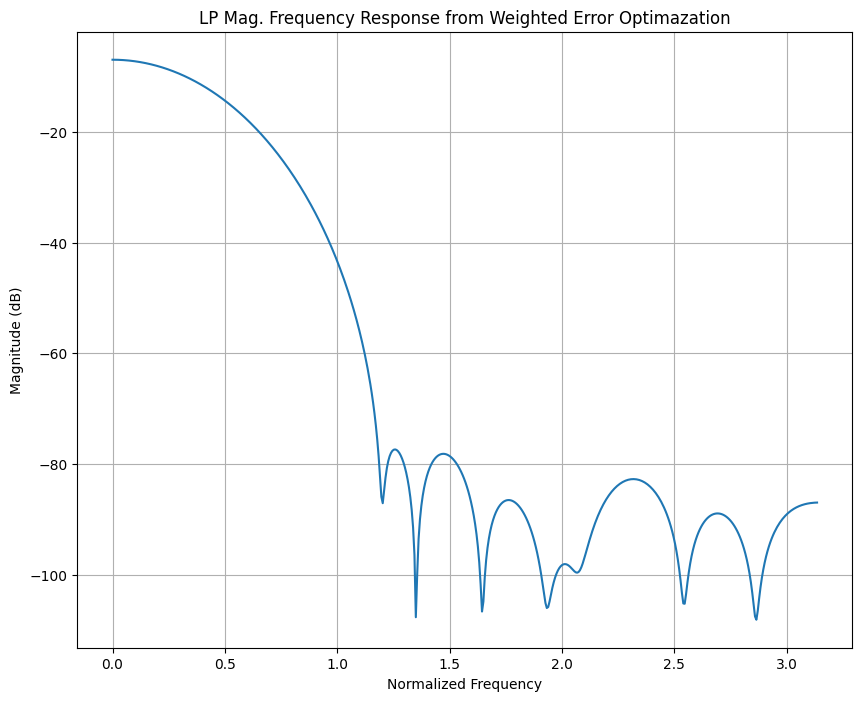

In [6]:
omega, H =signal.freqz(h)
plt.figure(figsize=(10,8))
plt.plot(omega, 20*np.log10(abs(H)+1e-6))
plt.xlabel('Normalized Frequency')
plt.ylabel('Magnitude (dB)')
plt.title('LP Mag. Frequency Response from Weighted Error Optimazation')
plt.grid()

# Penjelasan:
Menggunakan fungsi `signal.freqz` dari library SciPy untuk menghitung respons frekuensi dari filter yang telah dioptimalkan sebelumnya. Fungsi ini mengembalikan dua nilai, yaitu `omega` (frekuensi dalam radian per satuan waktu) dan `H` (respons frekuensi filter tersebut). Setelah mendapatkan respons frekuensi filter, kita membuat sebuah plot menggunakan Matplotlib dengan menggunakan nilai `omega` sebagai sumbu-x dan magnitude respons filter (dalam dB) sebagai sumbu-y. Fungsi `20*np.log10(abs(H)+1e-6)` digunakan untuk mengubah respons frekuensi filter menjadi skala logaritmik dalam dB. Dengan demikian, plot tersebut menunjukkan magnitude respons filter terhadap frekuensi dalam dB. Kita juga menambahkan label-label pada sumbu-sumbunya (`plt.xlabel`, `plt.ylabel`) serta judul plot (`plt.title`). Terakhir, `plt.grid()` digunakan untuk menambahkan grid pada plot, memudahkan dalam pembacaan.

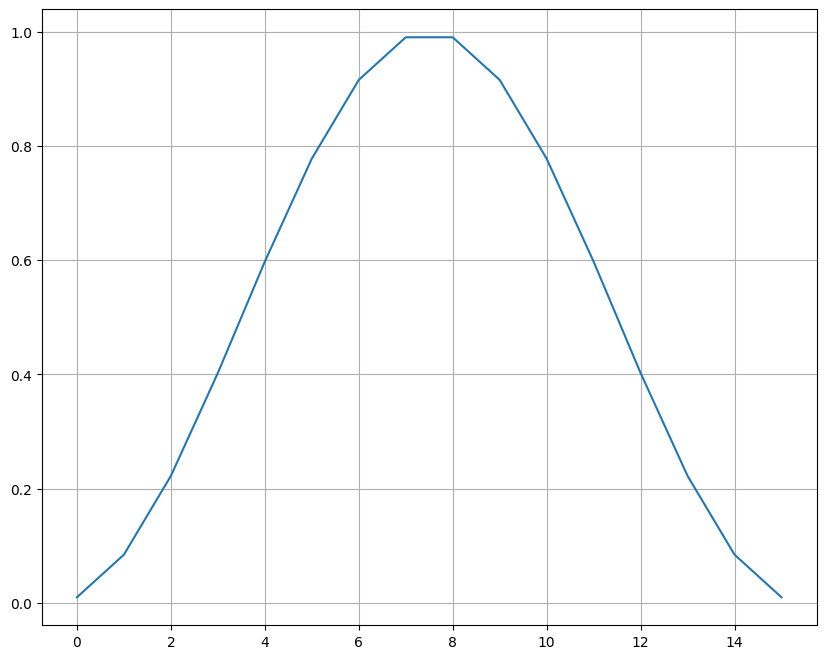

In [7]:
h=0.5-0.5*np.cos(2*np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

# Penjelasan:
Kode tersebut menghasilkan koefisien filter menggunakan metode Kaiser window dengan memanfaatkan formula pembuatan filter FIR. Dalam formula tersebut, koefisien dihitung menggunakan fungsi kosinus dengan parameter tertentu yang ditentukan. Array yang dihasilkan dari 0 hingga 15 ditambahkan dengan 0.5 untuk menggeser posisi sampel, sehingga filter menunjukkan respons yang lebih baik pada frekuensi yang lebih tinggi. Hasil dari fungsi kosinus tersebut kemudian disimpan sebagai koefisien filter dalam variabel `h`. Selanjutnya, plot dari koefisien filter yang dihasilkan ditampilkan menggunakan Matplotlib dengan grid untuk memudahkan pembacaan. Plot ini memperlihatkan distribusi nilai-nilai koefisien dari filter yang dibuat menggunakan metode Kaiser window.

In [8]:
def freqz(x):
    # get frequency bins and according magnitude values
    f, H = signal.freqz(x)

    #normalized frequency
    fNorm = f/np.pi

    # magnitude in dB
    hdB = 20 * np.log10(abs(H)+1e-5) #"+1e-5" avoids log10(0)!

    # open figure
    plt.figure(figsize=(10,8))

    plt.subplot(211)
    plt.title('Magnitude')
    plt.plot(f, hdB, 'b')
    plt.axis([0,3.14,np.min(hdB)-1,np.max(hdB)+1])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')

    plt.subplot(212)
    plt.title('Phase')
    angles = np.unwrap(np.angle(H))
    anglesGrad = (360 * angles)/(2*np.pi)
    plt.plot(f, anglesGrad, 'b')
    plt.axis([0,3.14,np.min(anglesGrad),np.max(anglesGrad)])
    plt.grid(True)
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.tight_layout()

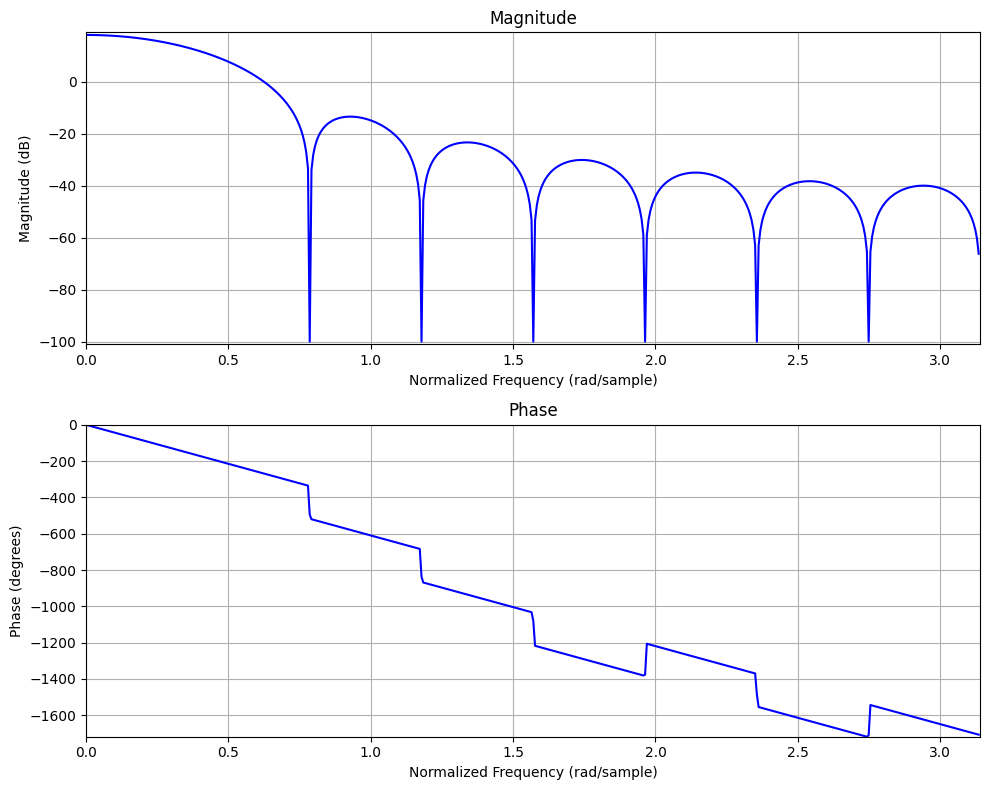

In [9]:
freqz(h)

# Penjelasan:
Fungsi `freqz` yang didefinisikan di atas digunakan untuk memvisualisasikan respons frekuensi dari sebuah filter FIR. Pertama, fungsi ini memanggil `signal.freqz(x)` untuk mendapatkan respons frekuensi `H` dari filter `x` yang diberikan. Selanjutnya, nilai frekuensi dinormalisasi dengan membaginya dengan nilai pi sehingga diperoleh frekuensi ter-normalisasi `fNorm`. Magnitudo dari respons frekuensi diubah ke skala desibel (`hdB`) menggunakan rumus 20 * log10(abs(H)+1e-5) yang melibatkan nilai absolut dan memperhatikan batas kasus logaritma 0.

Setelah itu, fungsi memvisualisasikan respons frekuensi dalam dua subplot. Subplot pertama menampilkan magnitudo respons frekuensi dalam skala desibel (`Magnitude`) terhadap frekuensi ter-normalisasi dengan sumbu-x menunjukkan frekuensi dalam radian per sampel. Sementara subplot kedua menunjukkan fase respons frekuensi (`Phase`) dalam derajat terhadap frekuensi ter-normalisasi. Dalam kedua subplot tersebut, grid ditambahkan untuk memudahkan pembacaan. Sehingga, dengan memanggil fungsi `freqz(h)`, kita dapat memvisualisasikan magnitudo dan fase respons frekuensi dari filter FIR yang telah ditentukan.

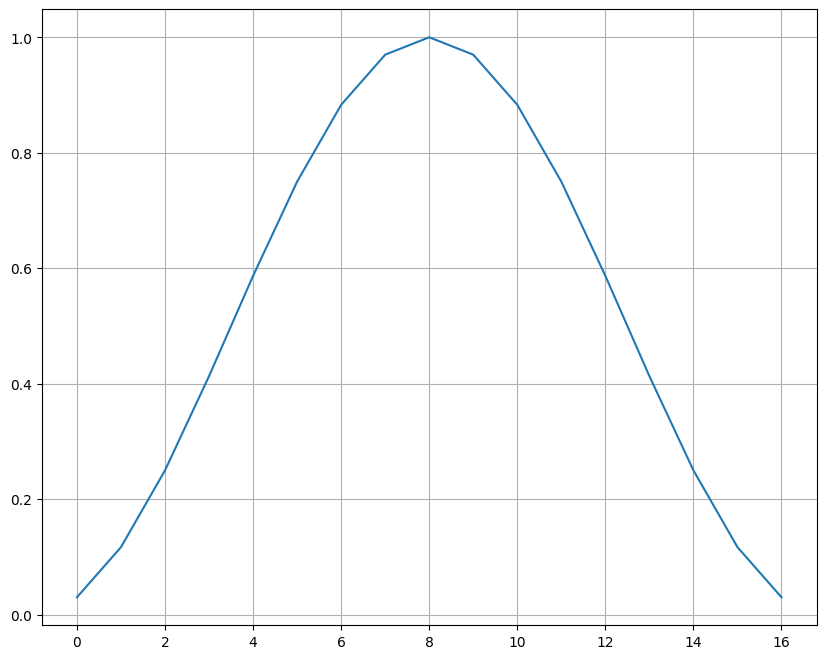

In [10]:
h=0.5-0.5*np.cos(2*np.pi/18*(np.arange(17)+1))

plt.figure(figsize=(10,8))
plt.plot(h)
plt.grid()

Dalam formula tersebut, nilai koefisien dihitung menggunakan fungsi kosinus dengan parameter tertentu. `np.arange(17)` digunakan untuk membuat array berurutan dari 0 hingga 16, yang kemudian ditambahkan dengan 1. Selanjutnya, hasil ini digunakan sebagai input untuk fungsi kosinus, dengan parameter yang diatur untuk menghasilkan 17 koefisien filter. Koefisien ini kemudian disimpan dalam variabel `h`. Membuat plot dari koefisien filter yang dihasilkan menggunakan Matplotlib. Dengan memanggil `plt.figure(figsize=(10,8))`, kita menentukan ukuran gambar yang ingin digunakan. `plt.plot(h)` digunakan untuk membuat plot dari koefisien filter `h`. Plot ini menampilkan nilai-nilai dari koefisien filter dalam bentuk garis. Fungsi `plt.grid()` digunakan untuk menambahkan grid pada plot, memudahkan dalam pembacaan. Dengan melakukan plot ini, kita dapat secara visual melihat distribusi nilai-nilai koefisien dari filter yang dihasilkan menggunakan metode Hamming window.

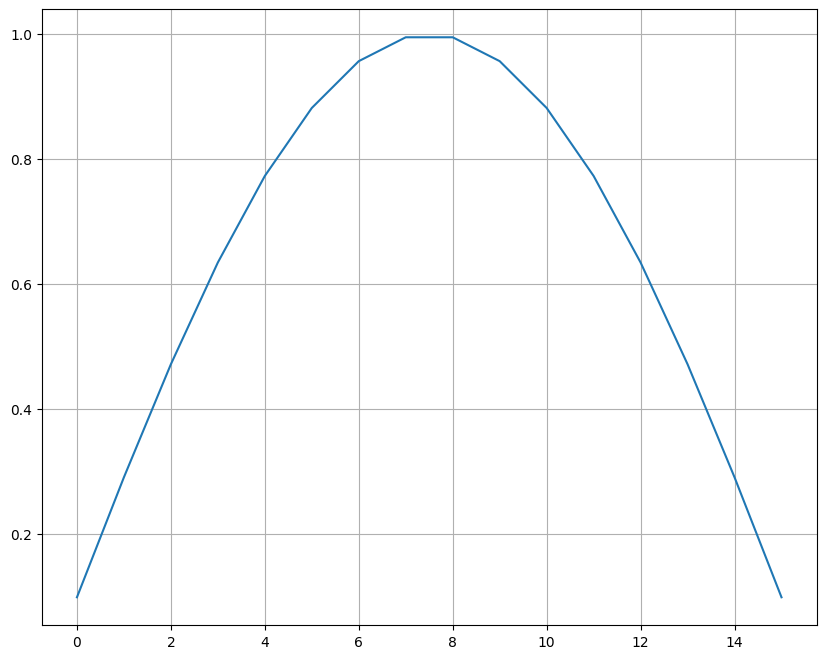

In [11]:
s=np.sin(np.pi/16*(np.arange(16)+0.5))

plt.figure(figsize=(10,8))
plt.plot(s)
plt.grid()

Its frequency response is:

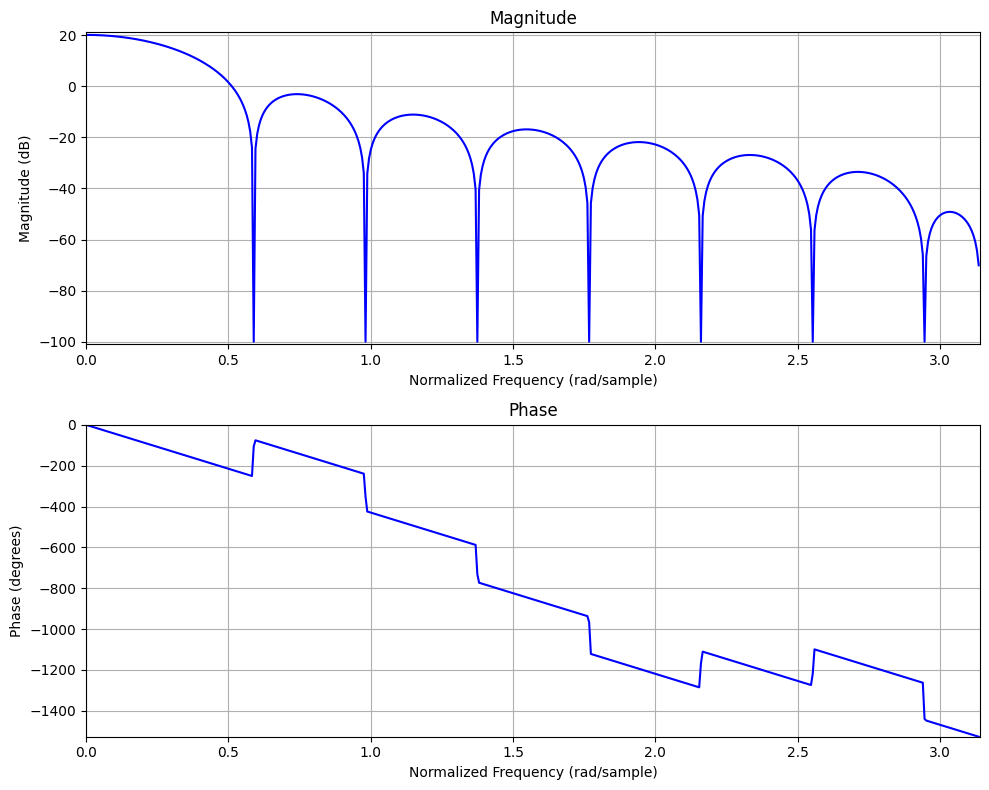

In [12]:
freqz(s)

# Penjelasan:
Dalam hal ini, `np.arange(16)` digunakan untuk membuat array berurutan dari 0 hingga 15, yang kemudian ditambahkan dengan 0.5. Hal ini dilakukan untuk menggeser posisi sampel sehingga respons filter lebih baik pada frekuensi yang lebih tinggi. Nilai-nilai yang dihasilkan dari fungsi sinus ini kemudian disimpan dalam variabel `s`. Membuat plot dari serangkaian nilai `s` yang dihasilkan menggunakan Matplotlib. Dengan memanggil `plt.figure(figsize=(10,8))`, kita menentukan ukuran gambar yang ingin digunakan. `plt.plot(s)` digunakan untuk membuat plot dari serangkaian nilai `s`. Plot ini menampilkan nilai-nilai dari serangkaian nilai tersebut dalam bentuk garis. Fungsi `plt.grid()` digunakan untuk menambahkan grid pada plot, memudahkan dalam pembacaan. Dengan melakukan plot ini, kita dapat secara visual melihat karakteristik serangkaian nilai yang dihasilkan dari fungsi sinus tersebut.

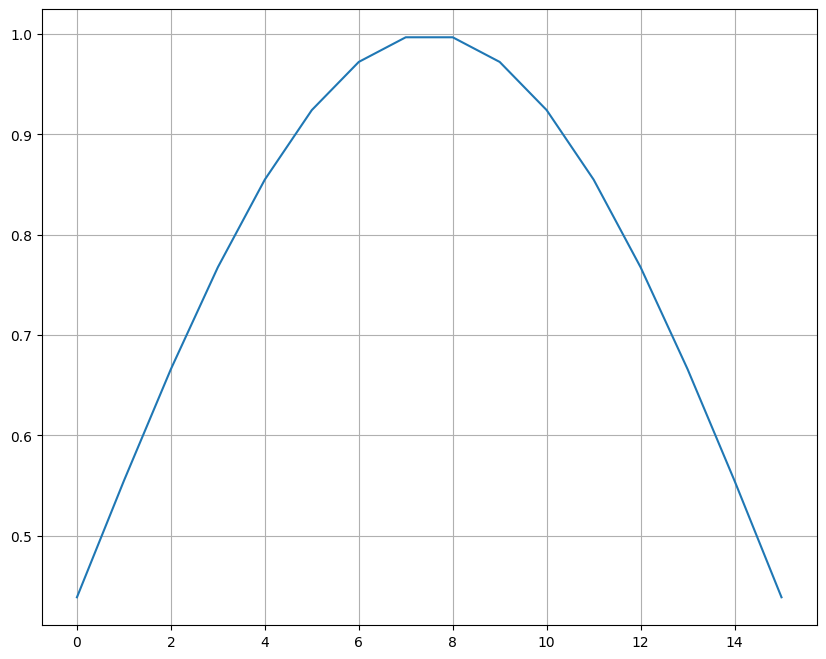

In [13]:
hk=np.kaiser(16,2)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

We obtain its frequency response with:

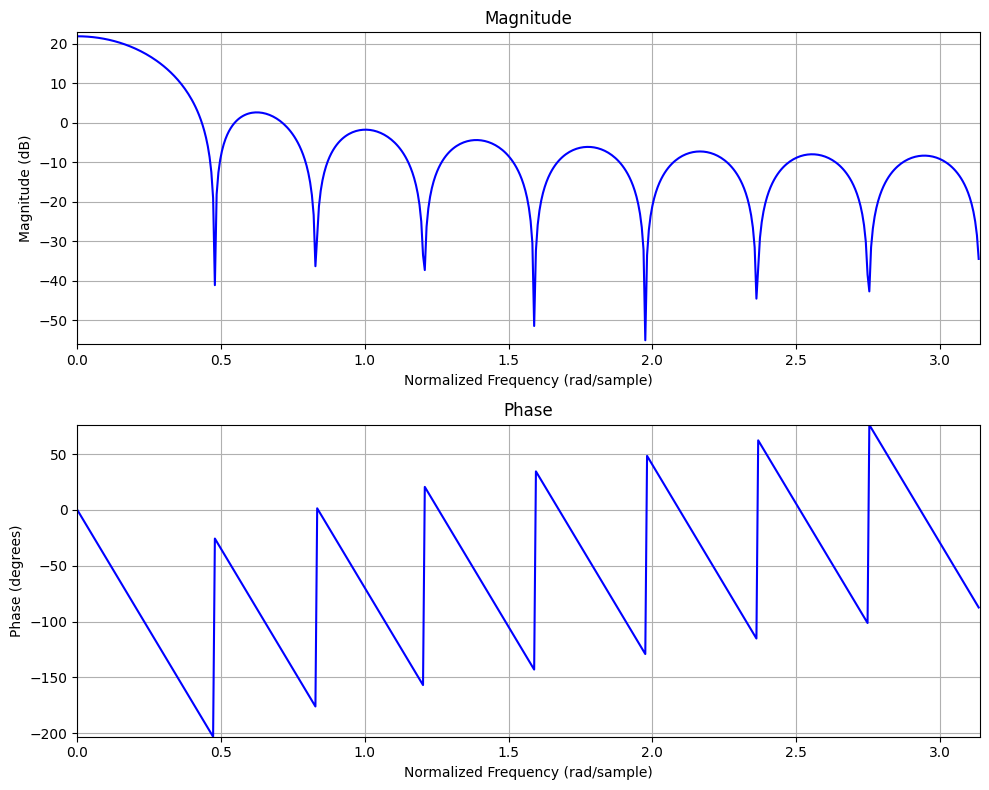

In [14]:
freqz(hk)

# Penjelasan:
Menggunakan fungsi `np.kaiser(16,2)` dari NumPy untuk menghasilkan serangkaian koefisien filter FIR dengan menggunakan metode Kaiser window. Fungsi `np.kaiser` ini menerima dua parameter: panjang jendela (16) dan beta (2), di mana beta merupakan parameter yang mengontrol bentuk jendela. Serangkaian koefisien filter FIR yang dihasilkan disimpan dalam variabel `hk`. Membuat plot dari serangkaian koefisien filter FIR yang dihasilkan menggunakan Matplotlib. Dengan memanggil `plt.figure(figsize=(10,8))`, kita menentukan ukuran gambar yang ingin digunakan. `plt.plot(hk)` digunakan untuk membuat plot dari serangkaian koefisien filter `hk`. Plot ini menampilkan nilai-nilai dari serangkaian koefisien tersebut dalam bentuk garis. Fungsi `plt.grid()` digunakan untuk menambahkan grid pada plot, memudahkan dalam pembacaan.

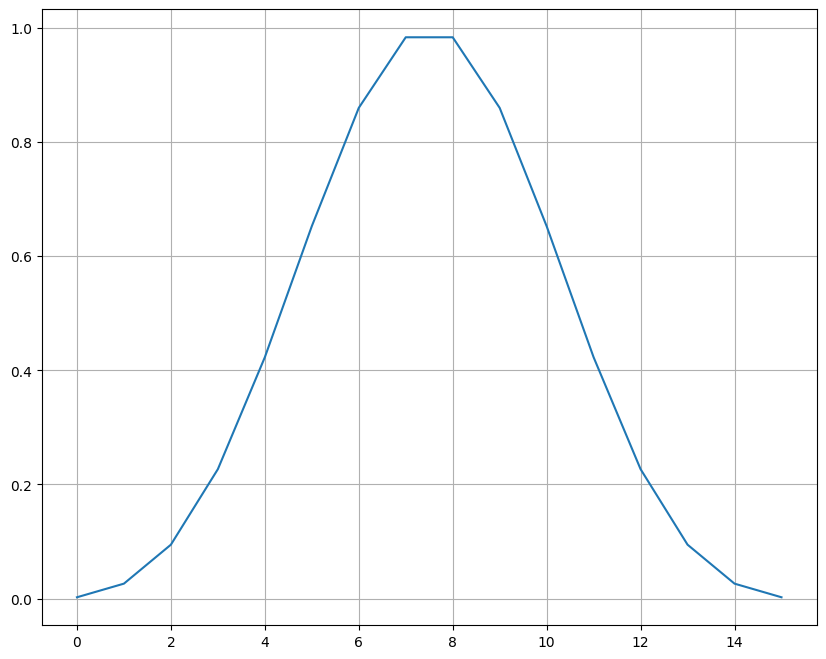

In [15]:
hk=np.kaiser(16,8)

plt.figure(figsize=(10,8))
plt.plot(hk)
plt.grid()

And for the frequency response we get:


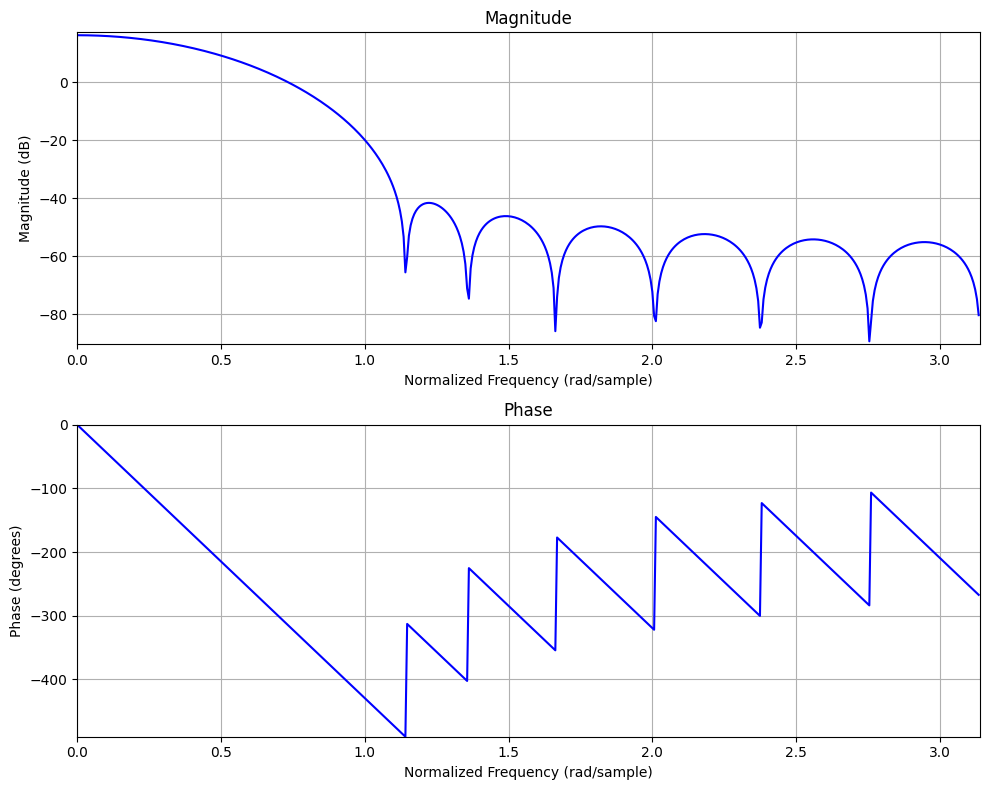

In [16]:
freqz(hk)

# Penjelasan:
Menggunakan fungsi `np.kaiser(16,8)` dari NumPy untuk menghasilkan serangkaian koefisien filter FIR dengan metode Kaiser window. Fungsi `np.kaiser` menerima dua parameter: panjang jendela (16) dan beta (8). Parameter beta mengontrol bentuk jendela Kaiser, di mana nilai yang lebih tinggi menghasilkan jendela dengan lobe utama yang lebih sempit dan side lobe yang lebih rendah. Serangkaian koefisien filter FIR yang dihasilkan disimpan dalam variabel `hk`.
Membuat plot dari serangkaian koefisien filter FIR yang dihasilkan menggunakan Matplotlib. Dengan memanggil `plt.figure(figsize=(10,8))`, kita menentukan ukuran gambar yang ingin digunakan. `plt.plot(hk)` digunakan untuk membuat plot dari serangkaian koefisien filter `hk`. Plot ini menampilkan nilai-nilai dari serangkaian koefisien tersebut dalam bentuk garis. Fungsi `plt.grid()` digunakan untuk menambahkan grid pada plot, memudahkan dalam pembacaan. Dengan melakukan plot ini, kita dapat secara visual melihat distribusi nilai-nilai koefisien dari filter yang dihasilkan menggunakan metode Kaiser window dengan parameter beta yang lebih tinggi. Semakin besar nilai beta, semakin sempit lobus utama jendela Kaiser dan semakin rendah sidelobe-nya.

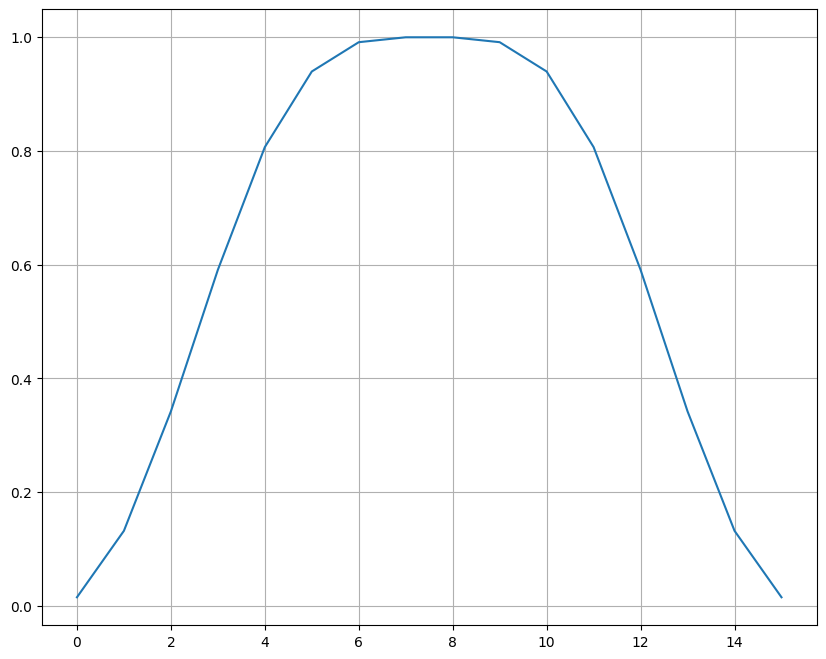

In [18]:
sq=np.sin(np.pi/2*(np.sin(np.pi/16*(np.arange(16)+0.5))**2))

plt.figure(figsize=(10,8))
plt.plot(sq)
plt.grid()

Its frequency response is:

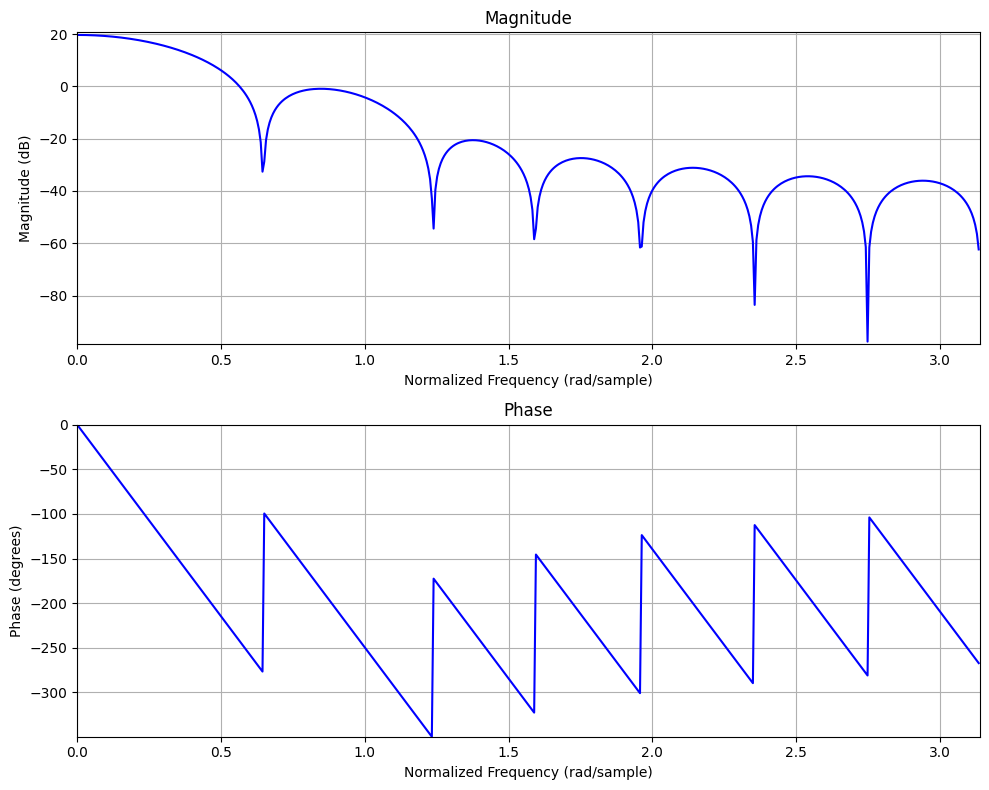

In [19]:
freqz(sq)

# Penjelasan:
Menggunakan fungsi sinus dengan frekuensi yang diubah berdasarkan nilai sinus dari array `np.arange(16)`. Array tersebut ditambahkan dengan 0.5 dan kemudian hasil sinus dari array tersebut dikuadratkan. Hal ini menghasilkan pengurangan frekuensi dari nilai awal sehingga respons filter lebih baik pada frekuensi yang lebih rendah. Nilai-nilai yang dihasilkan kemudian disimpan dalam variabel `sq`.
Membuat plot dari serangkaian nilai `sq` yang dihasilkan menggunakan Matplotlib. Dengan memanggil `plt.figure(figsize=(10,8))`, kita menentukan ukuran gambar yang ingin digunakan. `plt.plot(sq)` digunakan untuk membuat plot dari serangkaian nilai `sq`. Plot ini menampilkan nilai-nilai dari serangkaian nilai tersebut dalam bentuk garis. Fungsi `plt.grid()` digunakan untuk menambahkan grid pada plot, memudahkan dalam pembacaan.